In [1]:
import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
import pickle
import pandas as pd
import numpy as np

from random import Random
import matplotlib.pyplot as plt

### Un-pickle the data (reduced) version

In [15]:
with open('posterior_data_matrix_small_gap.pickle', 'rb') as file:
    posterior_data_matrix = pickle.load(file)

In [16]:
for i in range(5):
    for j in range(5):
        if i + j > 4:
            break
        print(np.median(posterior_data_matrix[i,j,:,0]))
        print(np.median(posterior_data_matrix[i,j,:,1]))
        print("\n")


0.18621831387281418
0.165994793176651


0.18805979937314987
0.30542394518852234


0.17406060546636581
0.41768302023410797


0.16430174559354782
0.49376992881298065


0.1903824806213379
0.6072010695934296


0.31082983314991
0.16767898947000504


0.5013960599899292
0.4887991398572922


0.40640510618686676
0.5040413439273834


0.3008865714073181
0.4951385110616684


0.6053641438484192
0.3944533169269562


0.49674439430236816
0.40803301334381104


0.41613560914993286
0.40156784653663635


0.48951534926891327
0.1822582706809044


0.4919494539499283
0.31160877645015717


0.6217215359210968
0.17733005434274673




In [19]:
def isMirroring(med_value, true_value):
    return abs(med_value - true_value) > 0.05

for i in range(5):
    for j in range(5):
        if i + j > 4:
            break

        curr_m_h = np.zeros((100,3))

        curr_true_m = 0.2 + 0.1 * i
        curr_true_h = 0.2 + 0.1 * j
        curr_m_median = np.median(posterior_data_matrix[i,j,:,0])
        curr_h_median = np.median(posterior_data_matrix[i,j,:,1])
        if isMirroring(curr_m_median, curr_true_m) or isMirroring(curr_h_median, curr_true_h):
            curr_m_h[:, 0] = 0.8 - posterior_data_matrix[i,j,:,1]
            curr_m_h[:, 1] = 0.8 - posterior_data_matrix[i,j,:,0]
            curr_m_h[:, 2] = posterior_data_matrix[i,j,:,2]
            posterior_data_matrix[i,j,:,:] = curr_m_h




for i in range(5):
    for j in range(5):
        if i + j > 4:
            break
        print(np.median(posterior_data_matrix[i,j,:,0]))
        print(np.median(posterior_data_matrix[i,j,:,1]))
        print("\n")

0.18621831387281418
0.165994793176651


0.18805979937314987
0.30542394518852234


0.17406060546636581
0.41768302023410797


0.16430174559354782
0.49376992881298065


0.1903824806213379
0.6072010695934296


0.31082983314991
0.16767898947000504


0.31120086014270787
0.29860394001007085


0.2959586560726166
0.3935948938131333


0.3008865714073181
0.4951385110616684


0.40554668307304387
0.19463585615158085


0.391966986656189
0.3032556056976319


0.41613560914993286
0.40156784653663635


0.48951534926891327
0.1822582706809044


0.4919494539499283
0.31160877645015717


0.6217215359210968
0.17733005434274673




### Define helper functions

In [20]:
def get_95_quantile(numpy_array):
    return np.percentile(numpy_array, 95)


def get_05_quantile(numpy_array):
    return np.percentile(numpy_array, 5)


def get_flag(quantile_05, quantile_95, true_value):
    if quantile_05 > true_value or quantile_95 < true_value:
        return 1
    else:
        return 0




### Process plot data

In [25]:
graph_data_matrix = np.zeros((2, 3, 5, 5))

for i in range(5):
    for j in range(5):
        if i + j > 4:
            break
        for para_index in range(2):

            posterior_para_array = posterior_data_matrix[i, j, :, para_index]  # para_index: 0-m, 1-h
            quantile_95 = get_95_quantile(posterior_para_array)
            quantile_05 = get_05_quantile(posterior_para_array)

            CI_width = quantile_95 - quantile_05  # C.I

            if para_index == 0:
                true_para = 0.2 + 0.1 * i
            else:
                true_para = 0.2 + 0.1 * j
            flag = get_flag(quantile_05, quantile_95, true_para)  # flag

            para_median = np.median(posterior_para_array)
            RE_in_percentage = abs(para_median - true_para) / true_para * 100  # R.E.

            graph_data_matrix[para_index, 0, i, j] = CI_width
            graph_data_matrix[para_index, 1, i, j] = flag
            graph_data_matrix[para_index, 2, i, j] = RE_in_percentage





### Transform

In [34]:
graph_data_matrix1 = np.zeros((2, 3, 5, 5))

for i in range(2):
    for j in range(3):
        for p in range(5):
            for q in range(5):
                graph_data_matrix1[i,j, 4-p, q] = graph_data_matrix[i,j, p, q]

print(graph_data_matrix[0,0,:,:])
print(graph_data_matrix1[0,0,:,:])

[[0.04933085 0.04672852 0.04976956 0.03679993 0.05758943]
 [0.03052193 0.02875165 0.0283004  0.03620257 0.        ]
 [0.02746774 0.02610962 0.03365858 0.         0.        ]
 [0.03323594 0.04761307 0.         0.         0.        ]
 [0.04896506 0.         0.         0.         0.        ]]
[[0.04896506 0.         0.         0.         0.        ]
 [0.03323594 0.04761307 0.         0.         0.        ]
 [0.02746774 0.02610962 0.03365858 0.         0.        ]
 [0.03052193 0.02875165 0.0283004  0.03620257 0.        ]
 [0.04933085 0.04672852 0.04976956 0.03679993 0.05758943]]


In [36]:

from scipy import io


# 保存为.mat文件
io.savemat('graph_data_matrix1.mat', {'array': graph_data_matrix1})


### Color plots

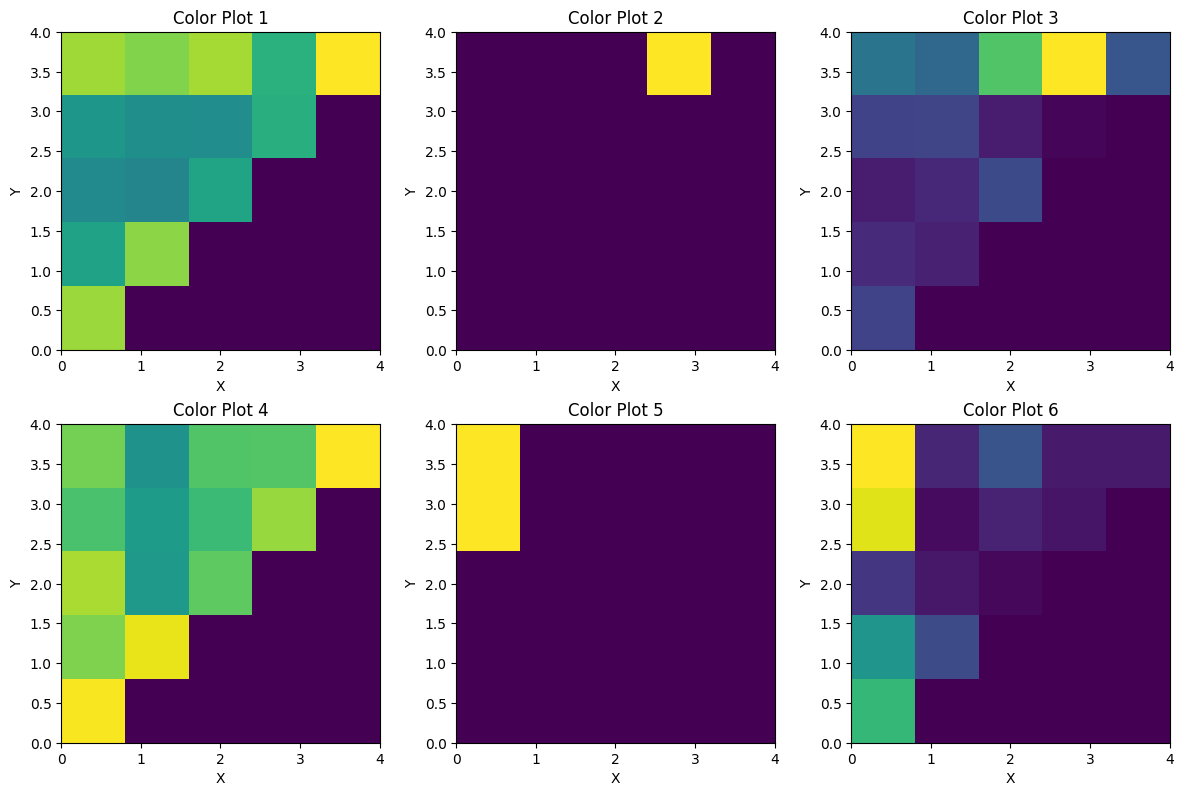

In [29]:
x = [0.2, 0.3, 0.4, 0.5, 0.6]
y = [0.2, 0.3, 0.4, 0.5, 0.6]

X, Y = np.meshgrid(x, y) # 创建网格


# 2x3x5x5的NumPy数组
Z = graph_data_matrix

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(2):
    for j in range(3):
        # 绘制彩色图
        axes[i, j].imshow(Z[i, j], cmap='viridis', extent=[0, 4, 0, 4])
        axes[i, j].set_title(f'Color Plot {i*3 + j + 1}')
        axes[i, j].set_xlabel('X')
        axes[i, j].set_ylabel('Y')

plt.tight_layout()
plt.show()




0.40640510618686676
0.5040413439273834


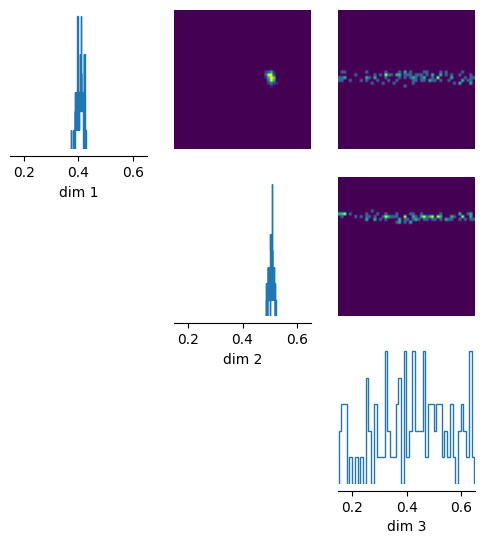

In [15]:
analysis.pairplot(posterior_data_matrix[1,2,:,:], limits=[[0.15, 0.65], [0.15, 0.65], [0.15,0.65]], figsize=(6, 6))

print(np.median(posterior_data_matrix[1,2,:,0]))
print(np.median(posterior_data_matrix[1,2,:,1]))